# Time gan - bar crawl 

The purpose of this notebook is to evaluate the synthetic data generated by TimeGan. Assessment will use: 

- Visual representations of the time series 
- Principal component analysis (PCA)

In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import os
import re

## Importing the data

The time_gan_run notebook outputted a set of synthetic datasets. Let's compare the synthetic data to the data they were trained on. 

In [2]:
# original
original = pd.read_csv('Data/unscaled_processed_data.csv')
# get train and test
ppts = original.pid.unique()
train_ppts = ppts[:7]
test_ppts = ppts[7:]
test_data= original[original['pid'].isin(test_ppts)].copy()
train_data= original[original['pid'].isin(train_ppts)].copy()

# add a comparable timestamp to the synthetic data
a=list(np.arange(0,5000, 10))
test_data['time'] = a * 4 # time sequence

# synth 
files=os.listdir('Data/synth_data')
store_list=[]
for file in files:
    path = 'Data/synth_data/' + file
    file_temp = pd.read_csv(path)
    file_temp['ID']=re.sub('.csv', '', file)  
    store_list.append(file_temp)
synth_data= pd.concat(store_list)

In [3]:
test_data.head()

,timestamp_s,x,y,z,TAC_Reading,pid,time
3500,2017-05-02 15:12:42,0.000209,0.003886,0.001777,0.096280,JR8022,0
3501,2017-05-02 15:12:52,0.000385,0.002943,0.001488,0.096234,JR8022,10
3502,2017-05-02 15:13:02,-0.000372,0.002567,0.001849,0.096188,JR8022,20
3503,2017-05-02 15:13:12,-0.000650,0.002400,0.001802,0.096142,JR8022,30
3504,2017-05-02 15:13:22,-0.000324,0.002010,0.002183,0.096096,JR8022,40


In [4]:
synth_data.head()

,Unnamed: 0,x,y,z,TAC_Reading,time,ID
0,0,0.011095,0.016094,-0.004228,0.001015,0,data_0
1,1,-0.088951,0.017062,-0.159987,0.002991,10,data_0
2,2,-0.142680,0.025910,-0.117513,0.024926,20,data_0
3,3,-0.019502,-0.038705,-0.013816,0.028025,30,data_0
4,4,-0.002474,0.007803,-0.021942,0.025767,40,data_0


In [5]:
# check the number of ids 
print(f"the number of ids in the test data is: {len(test_data.pid.unique())} and the number of ids in the synthetic data is: {len(synth_data.ID.unique())}")

the number of ids in the test data is: 4 and the number of ids in the synthetic data is: 14


# Visualisation

First we need to inspect the output test data, we then visualise the gan data. 

In [6]:
train_data

,timestamp_s,x,y,z,TAC_Reading,pid
0,2017-05-02 14:04:42,-0.067600,0.006867,-0.007600,0.030570,SA0297
1,2017-05-02 14:04:52,-0.001473,0.000177,-0.002505,0.030607,SA0297
2,2017-05-02 14:05:02,-0.000800,0.000277,-0.003118,0.030644,SA0297
3,2017-05-02 14:05:12,0.000536,-0.000064,-0.003059,0.030682,SA0297
4,2017-05-02 14:05:22,-0.000050,-0.000109,-0.001514,0.030719,SA0297
...,...,...,...,...,...,...
3495,2017-05-02 18:17:15,0.026297,0.043297,0.009880,0.063400,BU4707
3496,2017-05-02 18:17:25,0.042210,-0.031457,-0.032387,0.063316,BU4707
3497,2017-05-02 18:17:35,0.056635,0.020985,0.004933,0.063232,BU4707
3498,2017-05-02 18:17:45,0.113903,-0.072253,0.132482,0.063148,BU4707


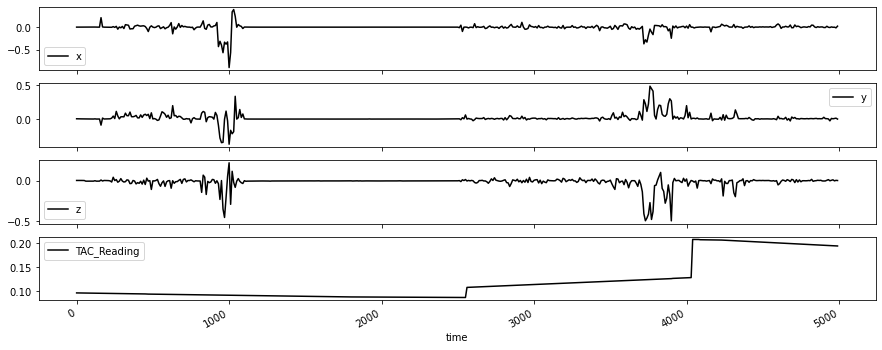

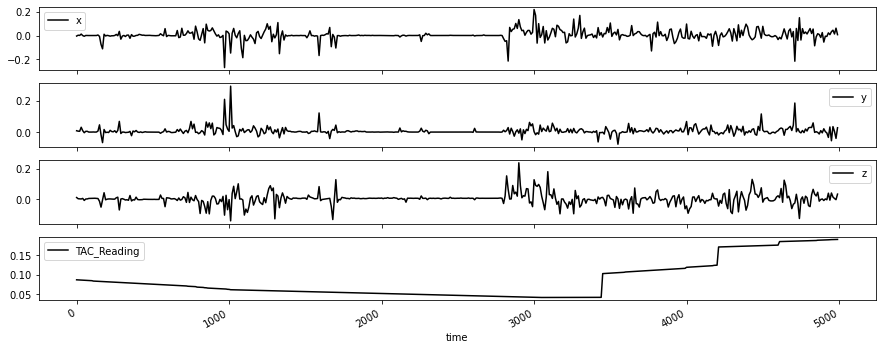

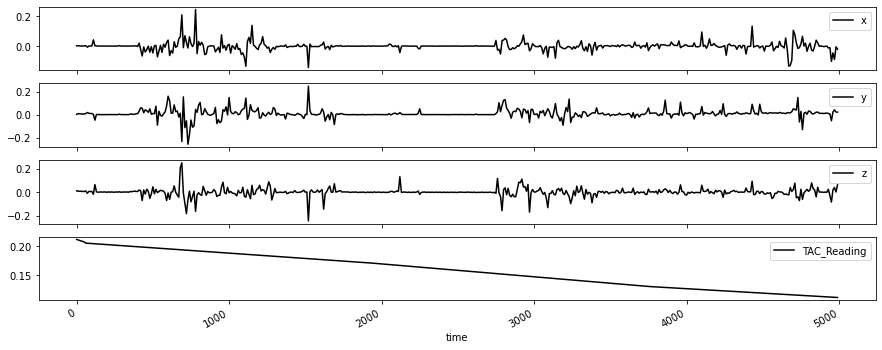

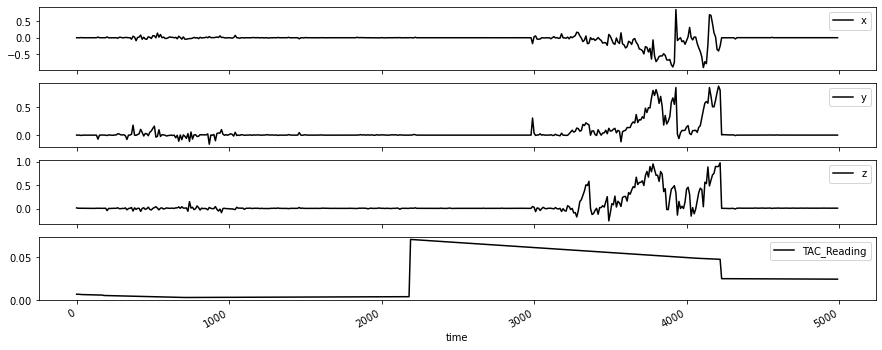

In [7]:
for i in test_data.pid.unique():
    tmp = test_data[test_data['pid'] == i][['x', 'y', 'z', 'TAC_Reading', 'time']] 
    tmp.set_index('time', drop =True, inplace= True)
    tmp.plot(subplots = True, figsize=(15,6), color ='black')
    plt.show();

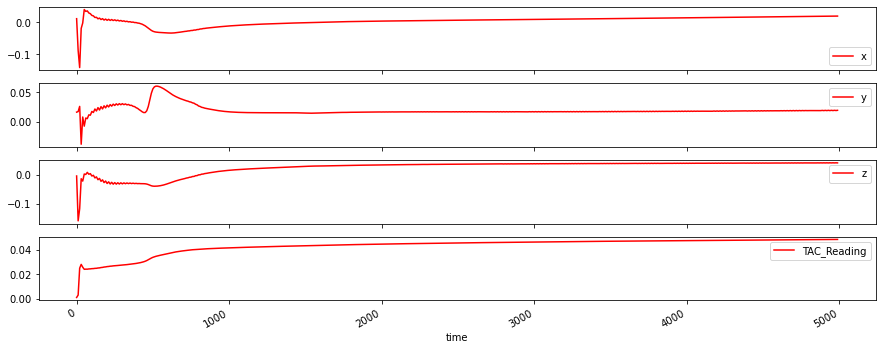

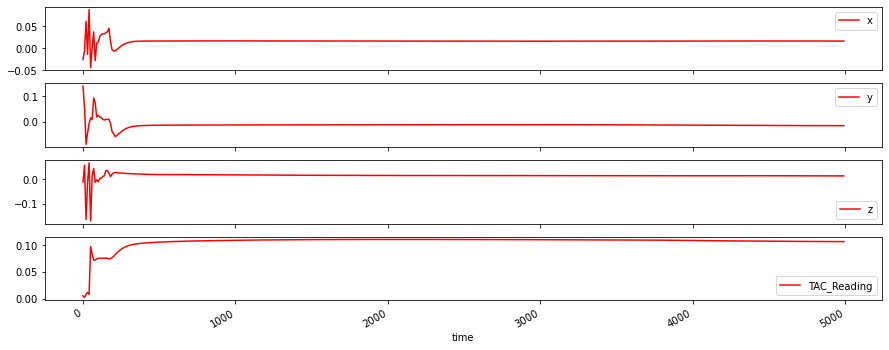

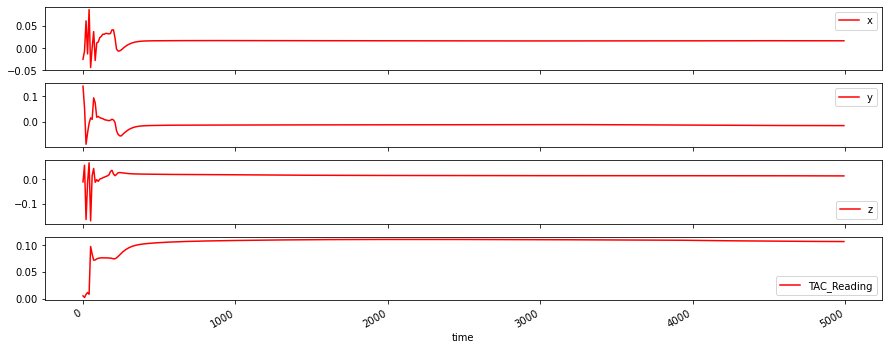

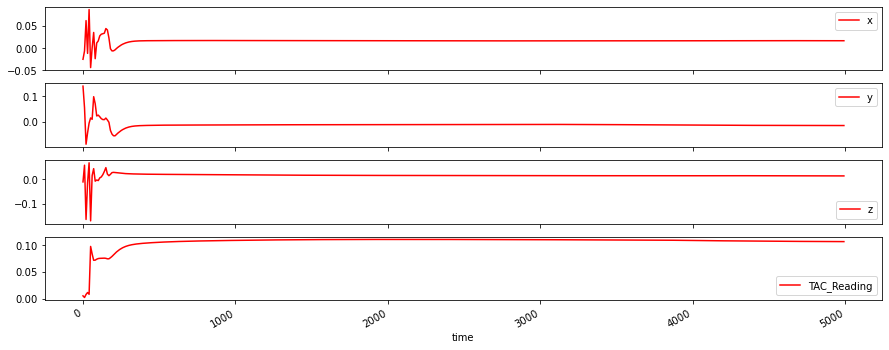

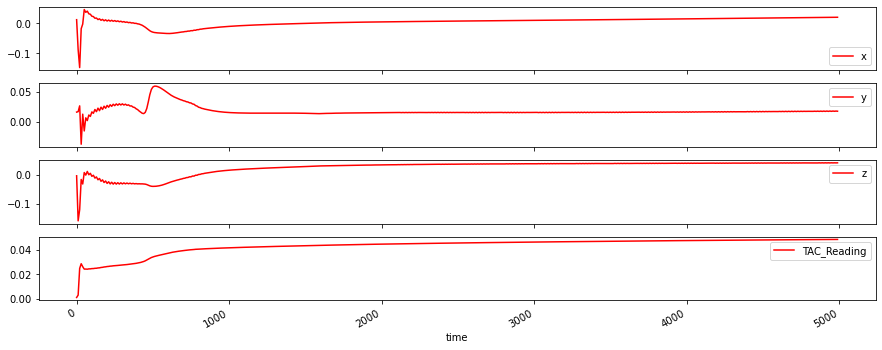

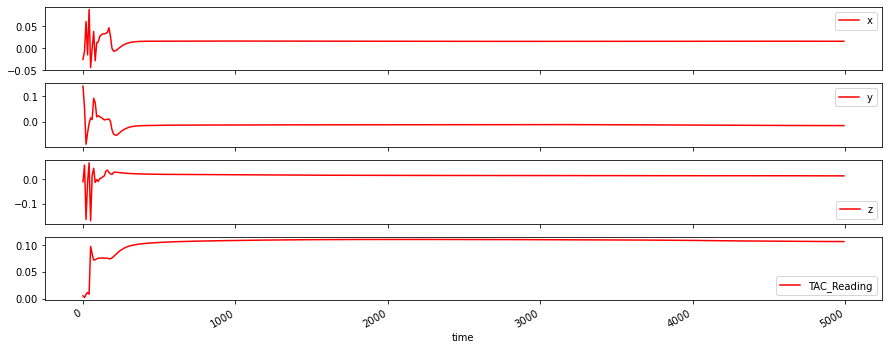

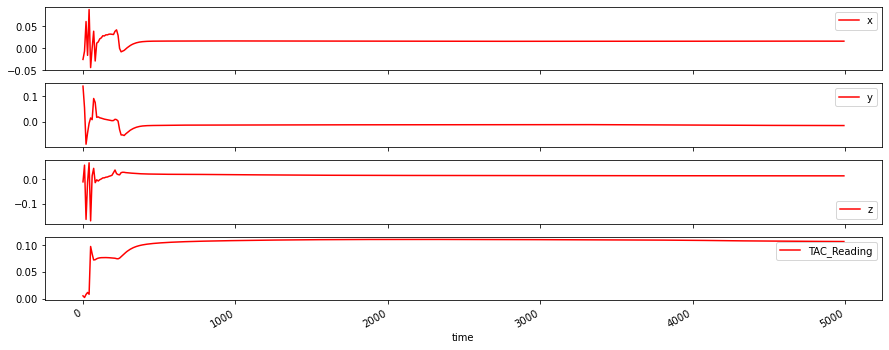

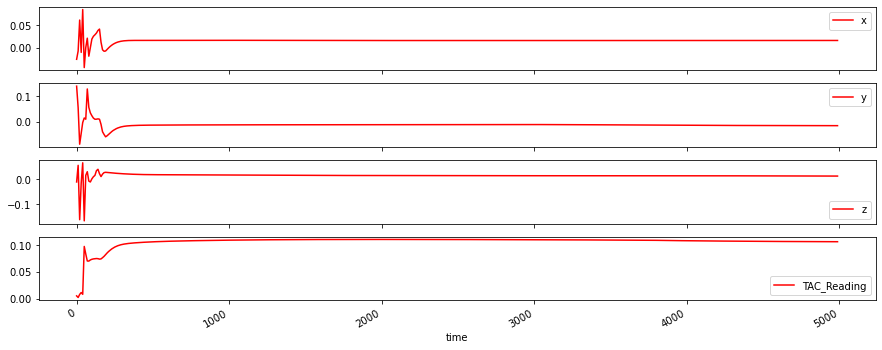

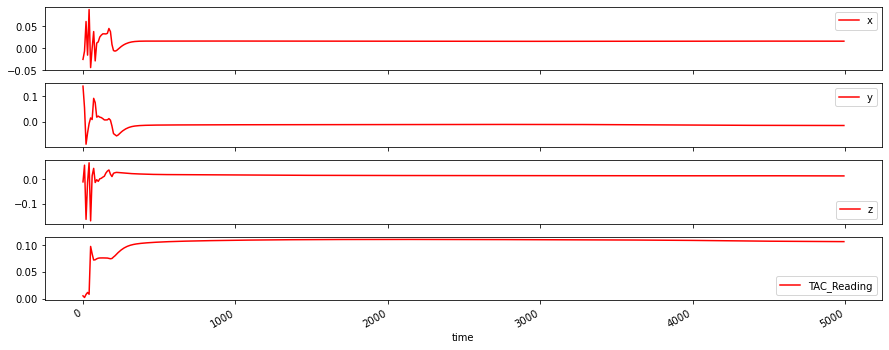

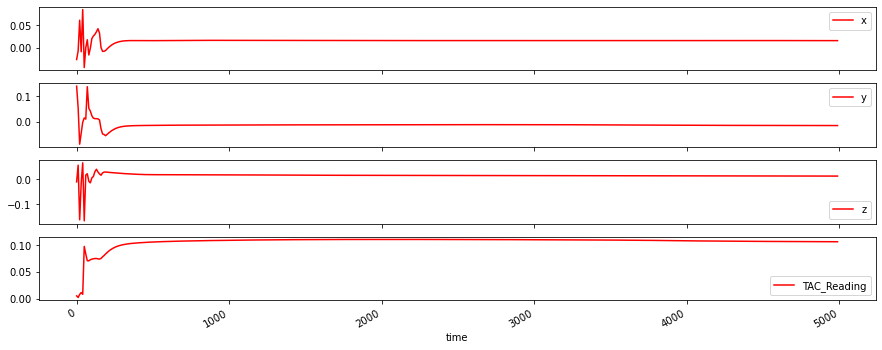

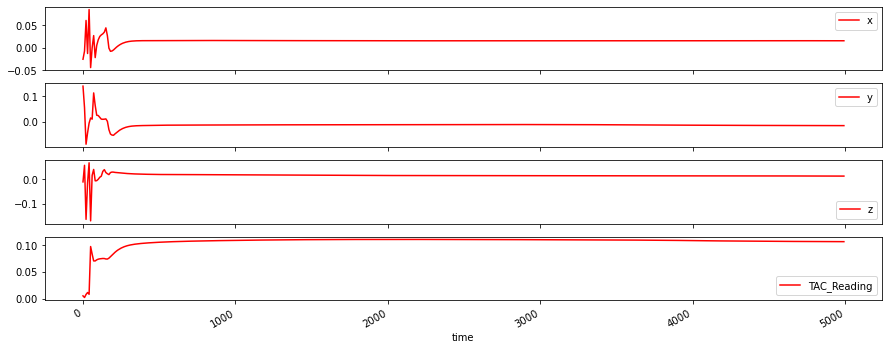

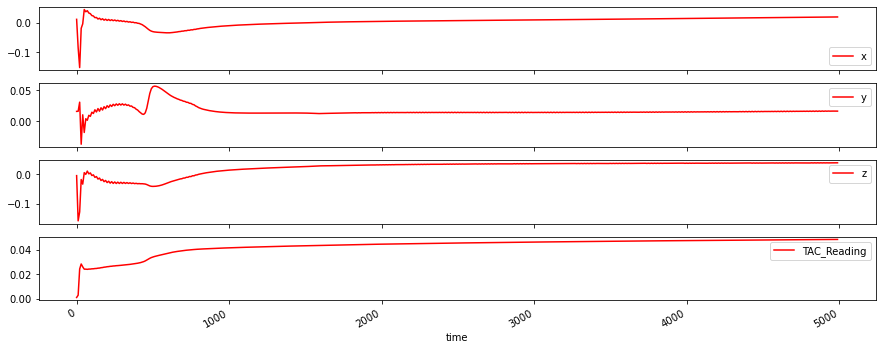

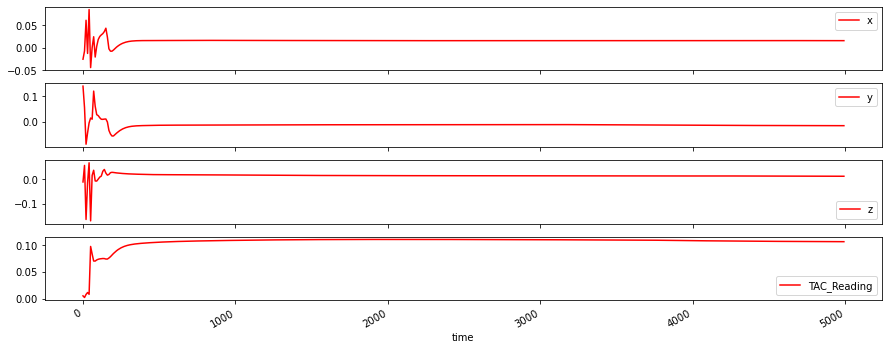

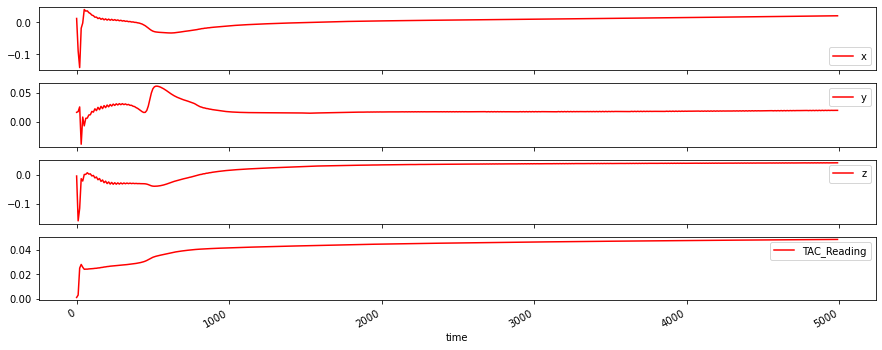

In [8]:
for i in synth_data.ID.unique():
    tmp = synth_data[synth_data['ID'] == i][['x', 'y', 'z', 'TAC_Reading', 'time']] 
    tmp.set_index('time', drop =True, inplace= True)
    tmp.plot(subplots = True, figsize=(15,6), color ='red')
    plt.show();

The gan clearly does not replicate the patterns seen in the test data and the outputs tend to plateau. 

# PCA 

In [9]:
p=5
synth_data

,Unnamed: 0,x,y,z,TAC_Reading,time,ID
0,0,0.011095,0.016094,-0.004228,0.001015,0,data_0
1,1,-0.088951,0.017062,-0.159987,0.002991,10,data_0
2,2,-0.142680,0.025910,-0.117513,0.024926,20,data_0
3,3,-0.019502,-0.038705,-0.013816,0.028025,30,data_0
4,4,-0.002474,0.007803,-0.021942,0.025767,40,data_0
...,...,...,...,...,...,...,...
495,495,0.019072,0.019361,0.041425,0.048412,4950,data_9
496,496,0.019149,0.019247,0.041532,0.048421,4960,data_9
497,497,0.019182,0.019338,0.041509,0.048428,4970,data_9
498,498,0.019262,0.019331,0.041512,0.048437,4980,data_9


In [10]:
from sklearn.decomposition import PCA

# get a sample of points 
p = np.random.randint(0,7)
sample_train = train_data[train_data['pid'] == train_data['pid'].unique()[p]][['x', 'y', 'z', 'TAC_Reading']].copy()
sample_synth = synth_data[synth_data['ID'] == synth_data['ID'].unique()[p]][['x', 'y', 'z', 'TAC_Reading']].copy()

# reshape long way to 1d 
real_sample = np.asarray(sample_train).reshape(-1) # reshape to 1 dimension
synthetic_sample = np.asarray(synth_data).reshape(-1)

# fit a pca to the original data 
n_components = 2 # get a 2d dimension 
pca = PCA(n_components=n_components)


pca.fit(train_data[['x', 'y', 'z', 'TAC_Reading']])

# transform pca
pca_real = pd.DataFrame(pca.transform(sample_train))
pca_synth = pd.DataFrame(pca.transform(sample_synth))

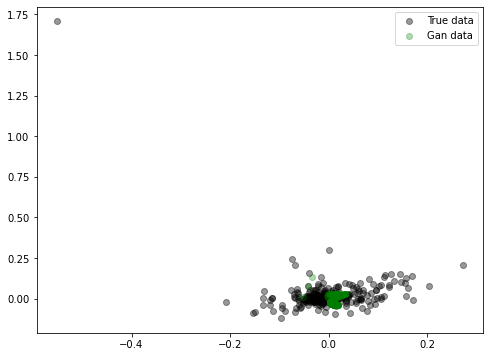

In [11]:
#PCA scatter plot
plt.rcParams["figure.figsize"] = (8,6) # get the plot size

plt.scatter(pca_real.iloc[:, 0].values, pca_real.iloc[:,1].values,
            c='black', alpha=0.4, label='True data')
plt.scatter(pca_synth.iloc[:,0], pca_synth.iloc[:,1],
            c='green', alpha=0.3, label='Gan data')
plt.legend()
plt.show();

# Conclusions 

The gan did not perform particularly well on the present dataset. It must be noted that the train sets were reduced to make the training process computationally feasible. This is probably particularly true because the sequence is really quite long. 